#  <span style="text-shadow: 80px 10px #CD5C5C; color: black;">Decision Tree</span> 

In [78]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [79]:
file_path = "C:/Users/Owner/source/vsc_repo/machine_learn_cookbook/Logistic_Regression_Quit-Predict/hr_file.csv"
hr_data = pd.read_csv(file_path, sep=",", engine="python", encoding="utf-8", encoding_errors="strict")
hr_data.rename(columns={'Departments ': 'Departments', 'salary' : 'Salary' }, inplace=True)
# hr_data.rename(str.title, axis='columns', inplace=True)
hr_data['Departments'] = [s.title() for s in hr_data['Departments']]
# hr_data.drop('Departments ', axis=1, inplace=True)
hr_data['Salary'] = [s.title() for s in hr_data['Salary']]
hr_data['Departments'] = hr_data['Departments'].replace(["Hr", "It","Mng", "Randd"], ["HR","IT","MNG","R&D"], regex=True, inplace=False)

##  <span style="text-shadow: 80px 10px black; color: #CD5C5C;">Exploratory Data Analysis</span>

In [80]:
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management
0,0.38,0.53,2,157,3,0,1,0,Sales,Low,31
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium,71
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium,8
3,0.72,0.87,5,223,5,0,1,0,Sales,Low,68
4,0.37,0.52,2,159,3,0,1,0,Sales,Low,48


In [81]:
hr_data.tail(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management
14994,0.40,0.57,2,151,3,0,1,0,Support,Low,49
14995,0.37,0.48,2,160,3,0,1,0,Support,Low,3
14996,0.37,0.53,2,143,3,0,1,0,Support,Low,5
14997,0.11,0.96,6,280,4,0,1,0,Support,Low,78
14998,0.37,0.52,2,158,3,0,1,0,Support,Low,99


In [82]:
hr_data.sample(n=5, random_state=3)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management
11584,0.65,0.74,4,233,4,1,0,0,Management,Low,0
5034,0.47,0.51,6,190,5,0,0,1,R&D,Medium,0
12282,0.83,0.92,5,267,6,0,1,0,Support,Low,22
28,0.41,0.46,2,128,3,0,1,0,Accounting,Low,46
9702,0.54,0.72,6,222,5,0,0,0,Marketing,High,0


In [83]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  int64  
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  int64  
 5   Work Accidents             14999 non-null  int64  
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   Salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [84]:
hr_data.dtypes

Satisfaction Level           float64
Last Evaluation              float64
Number of Projects             int64
Monthly Hours                  int64
Total Time at the Company      int64
Work Accidents                 int64
Quit the Company               int64
Promoted in Last 5 yrs         int64
Departments                   object
Salary                        object
Management                     int64
dtype: object

In [85]:
hr_data.index

RangeIndex(start=0, stop=14999, step=1)

In [86]:
hr_data.shape

(14999, 11)

In [87]:
hr_data.ndim

2

In [88]:
hr_data.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Departments', 'Salary',
       'Management'],
      dtype='object')

In [89]:
hr_data["Departments"].unique()

array(['Sales', 'Accounting', 'HR', 'Technical', 'Support', 'Management',
       'IT', 'Product_MNG', 'Marketing', 'R&D'], dtype=object)

In [90]:
hr_data["Salary"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [91]:
hr_data.describe()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,11.706780
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,25.300786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,100.000000


In [92]:
hr_data["Quit the Company"].loc[(hr_data["Departments"] == "IT") & (hr_data["Salary"] == "Low")].value_counts()

Quit the Company
0    437
1    172
Name: count, dtype: int64

In [93]:
hr_data["Quit the Company"].loc[(hr_data["Departments"] == "IT") & (hr_data["Salary"] == "Medium")].value_counts()

Quit the Company
0    438
1     97
Name: count, dtype: int64

In [94]:
hr_data["Quit the Company"].loc[(hr_data["Departments"] == "IT") & (hr_data["Salary"] == "High")].value_counts()

Quit the Company
0    79
1     4
Name: count, dtype: int64

##  <span style="text-shadow: 80px 10px #CD5C5C; color: black;">Preprocessing</span>

In [95]:

he = OneHotEncoder(categories="auto", drop="first", handle_unknown="error")
hr_encode = he.fit_transform(hr_data)
hr_dummies = pd.get_dummies(hr_data, prefix_sep="_", dummy_na=False, dtype=int, drop_first=True).dropna(axis=0, how="any", inplace=False)
hr_dummies.head(3)



,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management,Departments_HR,Departments_IT,Departments_Management,Departments_Marketing,Departments_Product_MNG,Departments_R&D,Departments_Sales,Departments_Support,Departments_Technical,Salary_Low,Salary_Medium
0,0.38,0.53,2,157,3,0,1,0,31,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,71,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,8,0,0,0,0,0,0,1,0,0,0,1


In [96]:
le = LabelEncoder()
hr_data["Departments_Encode"] = le.fit_transform(hr_data["Departments"])
hr_data["Salary_Encode"] = le.fit_transform(hr_data["Salary"])
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management,Departments_Encode,Salary_Encode
0,0.38,0.53,2,157,3,0,1,0,Sales,Low,31,7,1
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium,71,7,2
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium,8,7,2
3,0.72,0.87,5,223,5,0,1,0,Sales,Low,68,7,1
4,0.37,0.52,2,159,3,0,1,0,Sales,Low,48,7,1


In [97]:
X = hr_dummies.drop("Quit the Company",  axis=1)
y = hr_dummies["Quit the Company"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

##  <span style="text-shadow: 80px 10px black; color: #CD5C5C;">Decision Tree Classifier</span>

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion" : ["gini", "entropy", "log_loss"], "max_depth" : [6, 8, 10, 12], "min_samples_split" : [2, 4, 6, 8], "max_features" : ["auto", "sqrt", "log2"], 
              "random_state" : [0,42], }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy", verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_features="auto", min_samples_split=2, random_state=0)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=0;, score=0.997 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=0;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=0;, score=0.998 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=0;, score=0.999 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=0;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=42;, score=0.970 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, random_state=42;, score=0.986 total time=   0.0s
[CV 3/5] END criterion=g

[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=0;, score=0.999 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=0;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=42;, score=0.970 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=42;, score=0.986 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=42;, score=0.985 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=42;, score=0.983 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=4, random_state=42;, score=0.987 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=6, ran

##  <span style="text-shadow: 80px 10px #CD5C5C; color: black;">Visualization: Tree Plot</span>

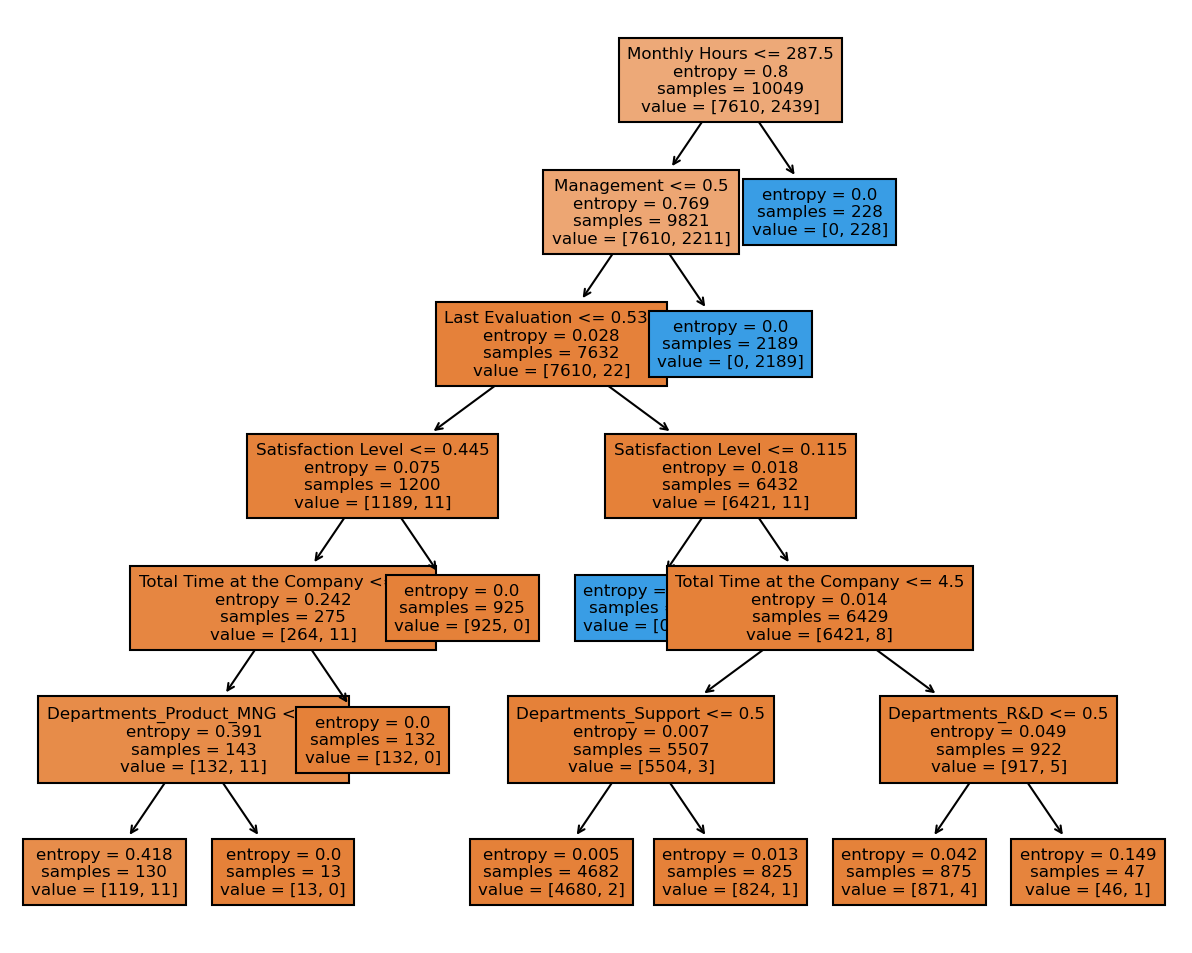

In [100]:
classNames=["No Quit, Quit"]
plt.figure(figsize=(10,8), dpi=150)
tree.plot_tree(dtc, feature_names=X.columns, filled=True, label="all", fontsize=8, impurity=True)
plt.show()

#  <span style="text-shadow: 80px 10px black; color:  #CD5C5C;">Decision Tree for Power BI</span>

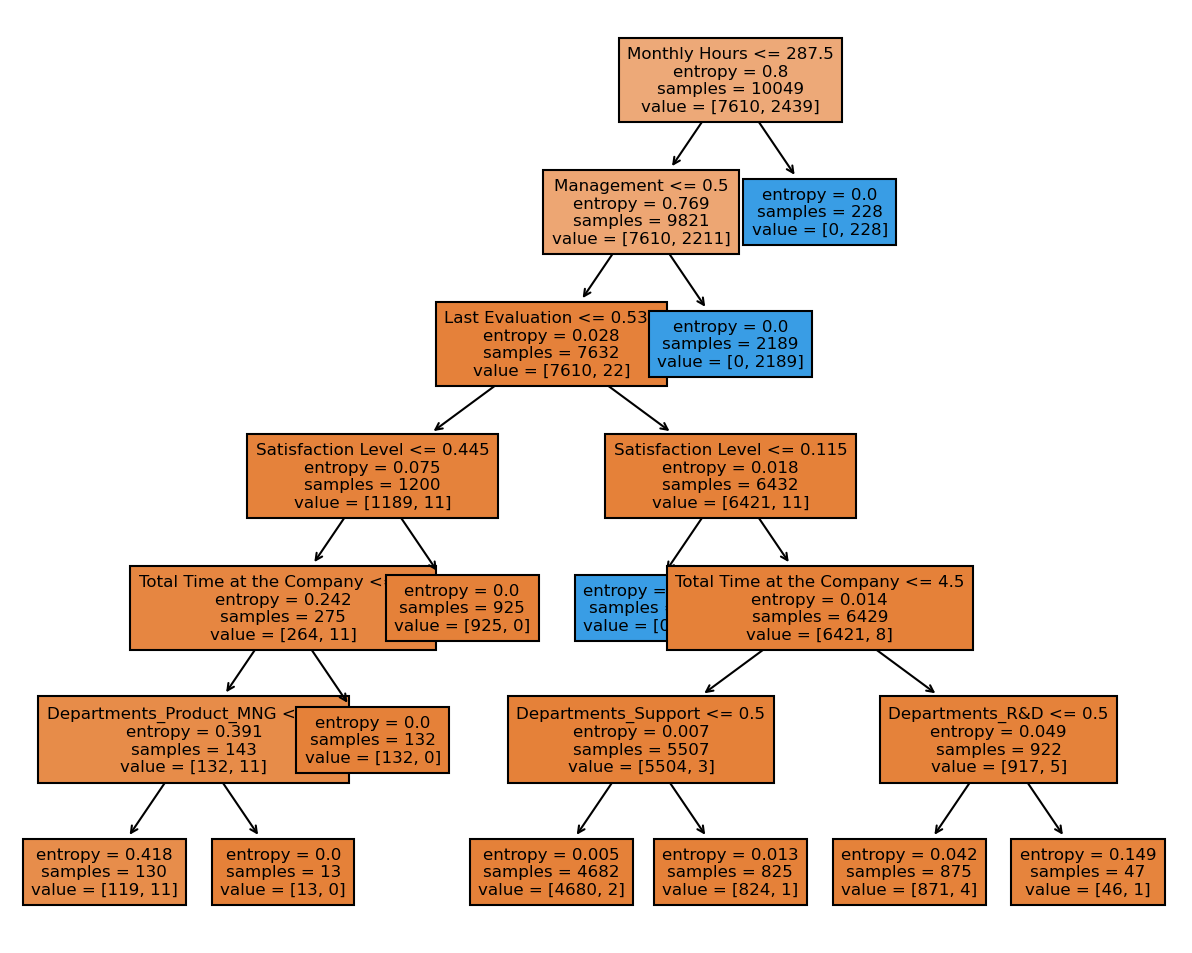

In [101]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

file_path = "C:/Users/Owner/source/vsc_repo/machine_learn_cookbook/Logistic_Regression_Quit-Predict/hr_file.csv"
hr_data = pd.read_csv(file_path, sep=",", engine="python", encoding="utf-8", encoding_errors="strict")
hr_data.rename(columns={'Departments ': 'Departments', 'salary' : 'Salary' }, inplace=True)
# hr_data.rename(str.title, axis='columns', inplace=True)
hr_data['Departments'] = [s.title() for s in hr_data['Departments']]
# hr_data.drop('Departments ', axis=1, inplace=True)
hr_data['Salary'] = [s.title() for s in hr_data['Salary']]
hr_data['Departments'] = hr_data['Departments'].replace(["Hr", "It","Mng", "Randd"], ["HR","IT","MNG","R&D"], regex=True, inplace=False)

hr_dummies = pd.get_dummies(hr_data, prefix_sep="_", dummy_na=False, dtype=int, drop_first=True).dropna(axis=0, how="any", inplace=False)

X = hr_dummies.drop("Quit the Company", axis=1)
y = hr_dummies["Quit the Company"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_features="auto", min_samples_split=2, random_state=0)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

classNames=["No Quit, Quit"]
plt.figure(figsize=(10,8), dpi=150)
tree.plot_tree(dtc, feature_names=X.columns, filled=True, label="all", fontsize=8, impurity=True)
plt.show()